# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

### Ejercicio

****El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

### Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

Haz una lista de 5 a 10 fuentes (documentación, artículos, etc) que usaste mientras trabajabas en el proyecto. Brinda explicaciones breves sobre las preguntas que cada fuente te ayudó a responder. Prepara una presentación con tus conclusiones. Puedes usar cualquier herramienta que quieras para hacer la presentación, pero debes enviarla en PDF. Coloca el enlace en el cuerpo del proyecto principal.

# Objetivo:
El objetivo principal es identificar a los operadores telefónicos menos eficaces dentro del servicio CallMeMaybe, a través de un análisis de datos de las llamadas (entrantes, salientes e internas). Esto se logra mediante:

- Un análisis exploratorio de los patrones de uso del servicio telefónico
- La identificación de operadores con un alto número de llamadas entrantes perdidas, largos tiempos de espera o baja actividad en llamadas salientes (según sus funciones)
- La validación de hipótesis estadísticas para confirmar si las diferencias observadas entre operadores son significativas y no aleatorias

## Especificación de detalles
¿Que se puede conciderar como una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes?
¿Hay un estandar para esto?
En caso de que no sea asi sugiero establecer un umbral de acuerdo a los datos o a partir de un clusterin dividir a los operadores en funcion de estas caracteristicas

# Hipotesis
Los operadores con una mayor duración de llamada promedio presentaran tambien tiempos de espera mas prolongados

# Plan de trabajo
- Preprocesamiento de datos
- Analisis exploratorio
- Obtención de tiempo de espera
- Comparación tiempo de espera duración de llamada
- Correlación tiempo de espera- llamadas perdidas
- Clasifición de operadores por clustering
- Análisis de clusters
- Conclusiónes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
clientes = pd.read_csv('C:/Users/HP/Desktop/Proyectos TripleTen/Dataset Proyecto Final Telecomunicaciones identificar operadores ineficaces/telecom_clients_us.csv')

data = pd.read_csv('C:/Users/HP/Desktop/Proyectos TripleTen/Dataset Proyecto Final Telecomunicaciones identificar operadores ineficaces/telecom_dataset_us.csv')

# Analisis exploratorio

In [3]:
print(clientes.shape)
clientes.describe()

(732, 3)


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


In [4]:
clientes.info()
clientes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
print(clientes['tariff_plan'].nunique(), clientes['tariff_plan'].unique())

3 ['A' 'C' 'B']


In [6]:
print(data.shape)
data.describe()

(53902, 9)


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


In [7]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [8]:
def conteo(df, columna, valor):
    numero = df[df[columna] ==valor]
    return print(f'numero de valores {valor} en la columna {columna}:', numero[columna].count())

In [9]:
conteo(data, 'internal', True)
conteo(data, 'internal', False)

numero de valores True en la columna internal: 6164
numero de valores False en la columna internal: 47621


In [10]:
data['direction'].unique()

array(['in', 'out'], dtype=object)

In [11]:
conteo(data, 'direction', 'in')
conteo(data, 'direction', 'out')

numero de valores in en la columna direction: 21985
numero de valores out en la columna direction: 31917


In [12]:
conteo(data, 'is_missed_call', False)
conteo(data, 'is_missed_call', True)

numero de valores False en la columna is_missed_call: 30334
numero de valores True en la columna is_missed_call: 23568


In [13]:
fig = px.histogram(data, x='call_duration', nbins = 30, title='Distribución de la duración de las llamadas')
fig.show()

In [14]:
fig = px.histogram(data, x='total_call_duration', nbins = 30, title='Distribución de la duración de las llamadas + tiempo de espera')
fig.show()

In [15]:
data_filtrado = data.dropna()

In [16]:
data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45670 non-null  int64  
 1   date                 45670 non-null  object 
 2   direction            45670 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       45670 non-null  bool   
 6   calls_count          45670 non-null  int64  
 7   call_duration        45670 non-null  int64  
 8   total_call_duration  45670 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


In [17]:
def distribucion(df, columna1, columna2):
    distribucion_duracion_llamadas = (
    df.groupby(columna1, as_index=False)
    .agg({columna2: 'mean'})
)
    x_v_A = pd.Series(range(0,len(distribucion_duracion_llamadas)))

    plt.scatter(x_v_A, distribucion_duracion_llamadas[columna2])
    plt.title(f'Distribucion de {columna2}')
    plt.legend()

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\992288228.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



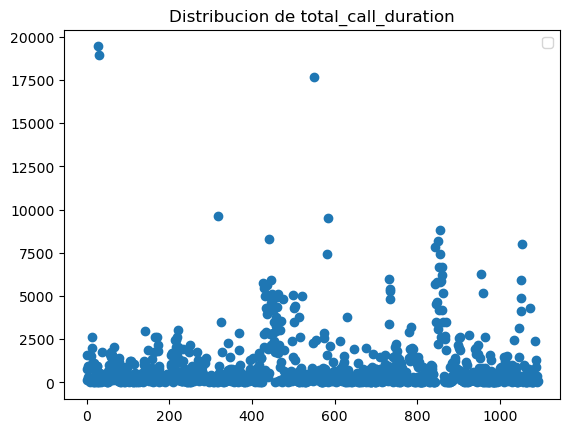

In [18]:
distribucion(data_filtrado, 'operator_id', 'total_call_duration')

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\992288228.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



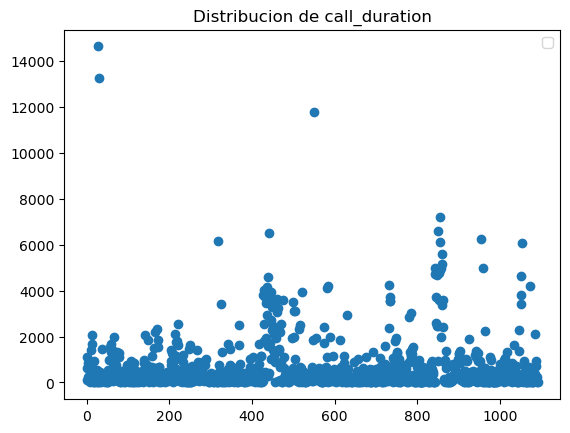

In [19]:
distribucion(data_filtrado, 'operator_id', 'call_duration')

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\992288228.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



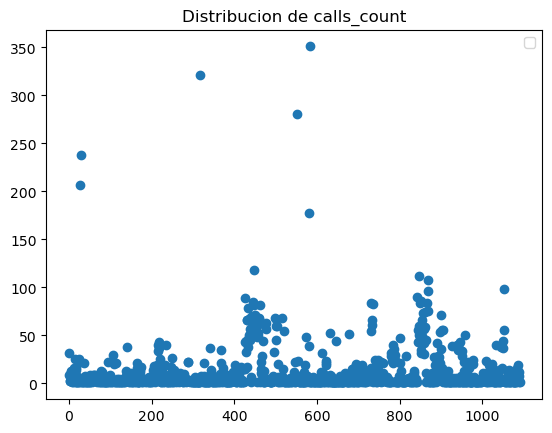

In [20]:
distribucion(data_filtrado, 'operator_id', 'calls_count')

In [21]:
data_filtrado["tiempo_espera"] = data_filtrado["total_call_duration"] - data_filtrado["call_duration"]

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\3311346272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\HP\AppData\Local\Temp\ipykernel_15584\992288228.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



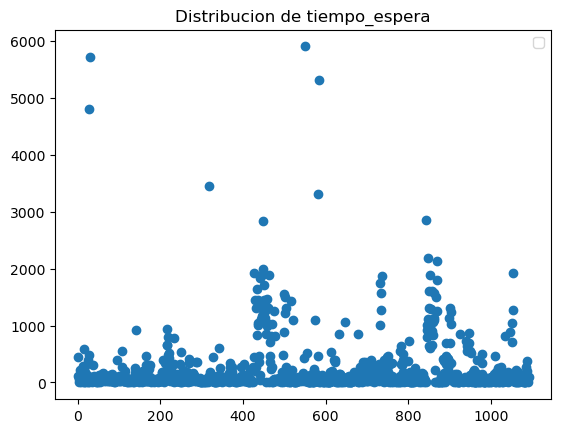

In [22]:
distribucion(data_filtrado, 'operator_id', "tiempo_espera")

In [23]:
data_filtrado['llamada_perdida'] = data_filtrado['is_missed_call'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\3909780794.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
correlacion = data_filtrado['tiempo_espera'].corr(data_filtrado['llamada_perdida'])
print("Correlación:", correlacion)

Correlación: 0.08241388377298274


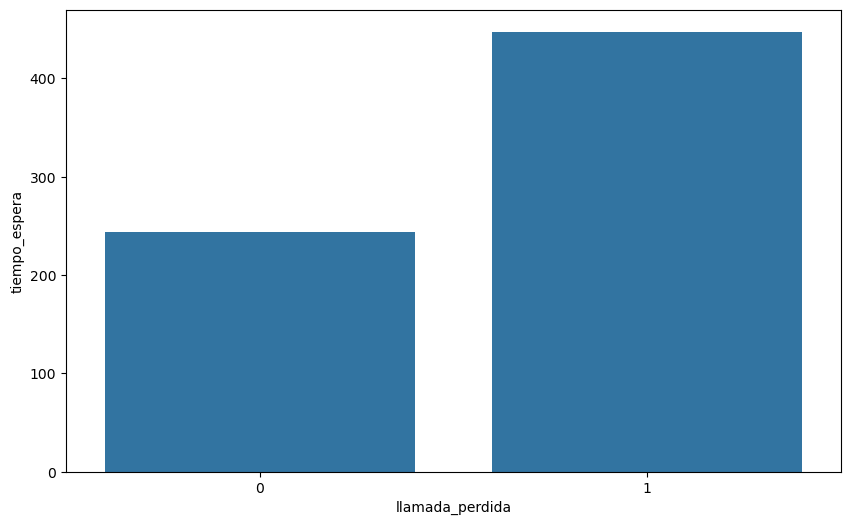

In [25]:
tiempo_medio = data_filtrado.groupby('llamada_perdida')['tiempo_espera'].mean().reset_index()
plt.figure(figsize=(10, 6))
# ci=None hace que no se muestren los intervalos de confianza
sns.barplot(x='llamada_perdida', y='tiempo_espera', data= tiempo_medio)
plt.show()

In [26]:
data_filtrado['llamada_interna'] = data_filtrado['internal'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\3843975004.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
data_filtrado['direction'] = data_filtrado['direction'].map({'in': 0, 'out': 1})

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\3325076975.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
data_filtrado.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tiempo_espera,llamada_perdida,llamada_interna
1,166377,2019-08-05 00:00:00+03:00,1,True,880022.0,True,3,0,5,5,1,1
2,166377,2019-08-05 00:00:00+03:00,1,True,880020.0,True,1,0,1,1,1,1
3,166377,2019-08-05 00:00:00+03:00,1,True,880020.0,False,1,10,18,8,0,1
4,166377,2019-08-05 00:00:00+03:00,1,False,880022.0,True,3,0,25,25,1,0
5,166377,2019-08-05 00:00:00+03:00,1,False,880020.0,False,2,3,29,26,0,0


In [29]:

data_filtrado['date'] = pd.to_datetime(data_filtrado['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\3136714543.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
data_filtrado['date'].describe()

count                                  45670
mean     2019-10-23 16:08:16.290781696+03:00
min                2019-08-02 00:00:00+03:00
25%                2019-10-06 00:00:00+03:00
50%                2019-10-28 00:00:00+03:00
75%                2019-11-14 00:00:00+03:00
max                2019-11-28 00:00:00+03:00
Name: date, dtype: object

In [31]:
numero_llamadas_operador = data_filtrado.groupby('operator_id')['calls_count'].sum()
print(numero_llamadas_operador.max())
print(numero_llamadas_operador.min())

66049
1


In [32]:
tiempo_laborando = data_filtrado.groupby('operator_id')['date'].agg(lambda x: x.max() - x.min())

In [33]:
data_filtrado = data_filtrado.merge(
    tiempo_laborando.rename('tiempo_laborando'), 
    on='operator_id', 
    how='left'
)

In [34]:
print(data_filtrado.head())

   user_id                      date  direction internal  operator_id  \
0   166377 2019-08-05 00:00:00+03:00          1     True     880022.0   
1   166377 2019-08-05 00:00:00+03:00          1     True     880020.0   
2   166377 2019-08-05 00:00:00+03:00          1     True     880020.0   
3   166377 2019-08-05 00:00:00+03:00          1    False     880022.0   
4   166377 2019-08-05 00:00:00+03:00          1    False     880020.0   

   is_missed_call  calls_count  call_duration  total_call_duration  \
0            True            3              0                    5   
1            True            1              0                    1   
2           False            1             10                   18   
3            True            3              0                   25   
4           False            2              3                   29   

   tiempo_espera  llamada_perdida  llamada_interna tiempo_laborando  
0              5                1                1         115 days  


In [35]:
print(data_filtrado['tiempo_laborando'].min())

0 days 00:00:00


In [36]:
print(data_filtrado['tiempo_laborando'].max())

118 days 00:00:00


In [37]:
data_filtrado.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
tiempo_espera          0
llamada_perdida        0
llamada_interna        0
tiempo_laborando       0
dtype: int64

In [38]:
print('Percentiles 95 99 grupo A', np.percentile(data_filtrado['total_call_duration'], [95, 99]))

Percentiles 95 99 grupo A [ 5036.   13579.04]


In [39]:
data_filtrado['dias_laborando'] = data_filtrado['tiempo_laborando'].dt.days
data_filtrado.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tiempo_espera,llamada_perdida,llamada_interna,tiempo_laborando,dias_laborando
0,166377,2019-08-05 00:00:00+03:00,1,True,880022.0,True,3,0,5,5,1,1,115 days,115
1,166377,2019-08-05 00:00:00+03:00,1,True,880020.0,True,1,0,1,1,1,1,59 days,59
2,166377,2019-08-05 00:00:00+03:00,1,True,880020.0,False,1,10,18,8,0,1,59 days,59
3,166377,2019-08-05 00:00:00+03:00,1,False,880022.0,True,3,0,25,25,1,0,115 days,115
4,166377,2019-08-05 00:00:00+03:00,1,False,880020.0,False,2,3,29,26,0,0,59 days,59


In [ ]:
# Seleccion de operadores con al menos 15 dias trabajando, se eligio este numero para evitar incluir operadores sin practica que recien podrian estar aprendiendo el oficio
operadores_mas15dias = data_filtrado[data_filtrado['dias_laborando'] > 15]

In [41]:
df_f = operadores_mas15dias.drop(columns = ['user_id', 'date', 'is_missed_call', 'internal'])

In [42]:
df_f.head()

,direction,operator_id,calls_count,call_duration,total_call_duration,tiempo_espera,llamada_perdida,llamada_interna,tiempo_laborando,dias_laborando
0,1,880022.0,3,0,5,5,1,1,115 days,115
1,1,880020.0,1,0,1,1,1,1,59 days,59
2,1,880020.0,1,10,18,8,0,1,59 days,59
3,1,880022.0,3,0,25,25,1,0,115 days,115
4,1,880020.0,2,3,29,26,0,0,59 days,59


# Conclusion parte 1
Se observo un promedio de 866.68 segundos por llamada con un promedio de 1157.13 seguntos totales de llamada, incluyendo tiempo de espera, sin embargo, se presentaron varios valores anomalos, con un valor maximo de 144395 segundos de llamada efectiva y 166155 segundos de tiempo total de llamada. Se observo un mayor promedio de tiempo de espera en el grupo de llamadas perdidas que en el grupo de llamadas no perdidas. Asi mismo se observo que algunos operadores llevaban cero dias en la empresa, y por lo tanto era su primer dia, mientras que el operador del que se tiene mayor antiguedad en los datos lleva 118 dias, por esta razon, se decidio filtrar a los operadores que tuvieran al menos 15 dias en la empresa, para evitar incluir empleados nuevos con poca experiencia que recien se esten acoplando al trabajo y que no cuentan con muchos datos.


# Analisis de clusters

In [44]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [45]:
df_operadores = df_f.groupby('operator_id').agg({
    'calls_count': 'sum',
    'call_duration': 'mean',
    'tiempo_espera': 'mean',
    'llamada_perdida': 'mean',
    'dias_laborando': 'first'  # Asumimos que es constante por operador
}).reset_index()

In [46]:
df_operadores.columns = [
    'operador_id',                        # identificador del operador
    'total_llamadas',                     # total de llamadas manejadas
    'duracion_llamadas_efectivas',       # suma de call_duration (duración efectiva sin contar espera)
    'tiempo_espera_promedio',            # promedio de espera por llamada
    'tasa_llamadas_perdidas',            # proporción (mean) de llamadas perdidas
    'dias_laborando'
]

In [47]:
df_operadores.head()

,operador_id,total_llamadas,duracion_llamadas_efectivas,tiempo_espera_promedio,tasa_llamadas_perdidas,dias_laborando
0,879896.0,1131,650.476562,110.671875,0.390625,115
1,879898.0,7973,1115.504000,451.860000,0.400000,118
2,880020.0,54,104.090909,15.181818,0.318182,59
3,880022.0,219,240.842105,57.565789,0.434211,115
4,880026.0,2439,856.939394,121.171717,0.474747,113


In [48]:
df_operadores_f = df_operadores[['operador_id']].rename(columns={'operator_id': 'operador_id'})
df_operadores_f['llamadas_por_dia'] = df_operadores['total_llamadas'] / df_operadores['dias_laborando']
df_operadores_f['duracion_promedio'] = df_operadores['duracion_llamadas_efectivas']
df_operadores_f['espera_promedio'] = df_operadores['tiempo_espera_promedio']
df_operadores_f['tasa_llamadas_perdidas'] = df_operadores['tasa_llamadas_perdidas']

Debido a la diferencia de tiempo en la empresa entre los operadores se decidio trabajar con datos relativos, que no estan influenciados por el tiempo de trabajo en la empresa, y sesgar el analisis por empleados que han acumulado un mayor numero de llamadas y llamadas perdidas debido a su tiempo laborando

In [49]:
df_operadores_f.head()

,operador_id,llamadas_por_dia,duracion_promedio,espera_promedio,tasa_llamadas_perdidas
0,879896.0,9.834783,650.476562,110.671875,0.390625
1,879898.0,67.567797,1115.504000,451.860000,0.400000
2,880020.0,0.915254,104.090909,15.181818,0.318182
3,880022.0,1.904348,240.842105,57.565789,0.434211
4,880026.0,21.584071,856.939394,121.171717,0.474747


In [50]:
print(df_operadores_f.isnull().sum())

operador_id               0
llamadas_por_dia          0
duracion_promedio         0
espera_promedio           0
tasa_llamadas_perdidas    0
dtype: int64


In [51]:
X = df_operadores_f.drop(columns='operador_id')

In [52]:
print(X.head())

   llamadas_por_dia  duracion_promedio  espera_promedio  \
0          9.834783         650.476562       110.671875   
1         67.567797        1115.504000       451.860000   
2          0.915254         104.090909        15.181818   
3          1.904348         240.842105        57.565789   
4         21.584071         856.939394       121.171717   

   tasa_llamadas_perdidas  
0                0.390625  
1                0.400000  
2                0.318182  
3                0.434211  
4                0.474747  


In [53]:
print(type(X))
print(X.head())
print(X.dtypes)
print(X.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
   llamadas_por_dia  duracion_promedio  espera_promedio  \
0          9.834783         650.476562       110.671875   
1         67.567797        1115.504000       451.860000   
2          0.915254         104.090909        15.181818   
3          1.904348         240.842105        57.565789   
4         21.584071         856.939394       121.171717   

   tasa_llamadas_perdidas  
0                0.390625  
1                0.400000  
2                0.318182  
3                0.434211  
4                0.474747  
llamadas_por_dia          float64
duracion_promedio         float64
espera_promedio           float64
tasa_llamadas_perdidas    float64
dtype: object
llamadas_por_dia          0
duracion_promedio         0
espera_promedio           0
tasa_llamadas_perdidas    0
dtype: int64


In [54]:
scaler = StandardScaler()

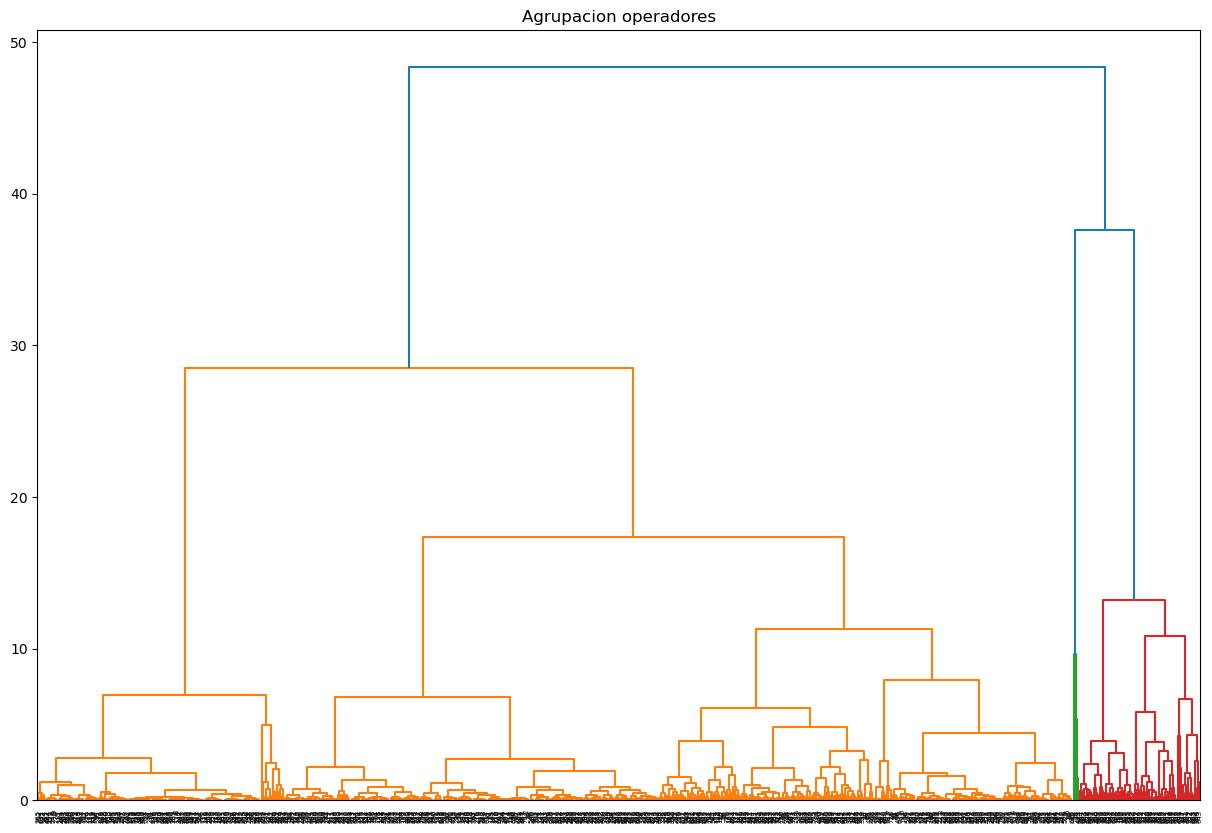

In [55]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupacion operadores')
plt.show()

In [102]:
km = KMeans(n_clusters = 2)

labels = km.fit_predict(X_st)
df_operadores_f['cluster_km'] = labels 
df_operadores_f.groupby('cluster_km').mean()

c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,operador_id,llamadas_por_dia,duracion_promedio,espera_promedio,tasa_llamadas_perdidas
cluster_km,,,,,
0,920534.303207,11.345465,468.565435,115.574339,0.280806
1,929080.438356,139.245746,3618.299685,1601.626782,0.503279


In [103]:
new_columns = df_operadores_f.drop(['cluster_km', 'operador_id'], axis = 1).columns

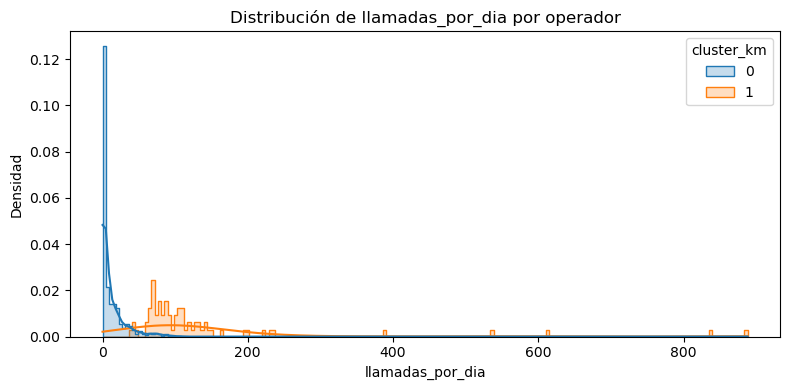

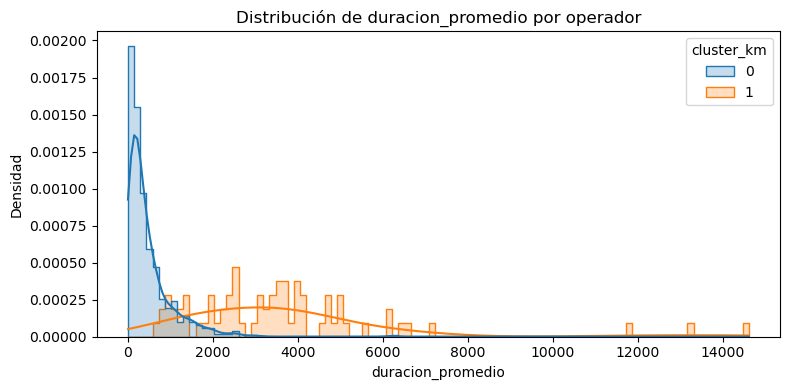

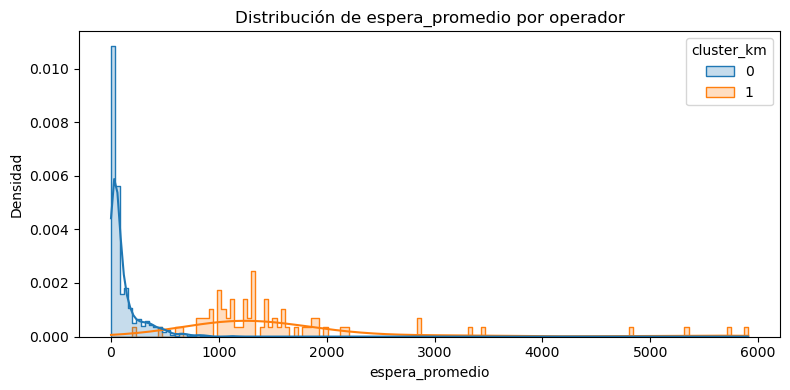

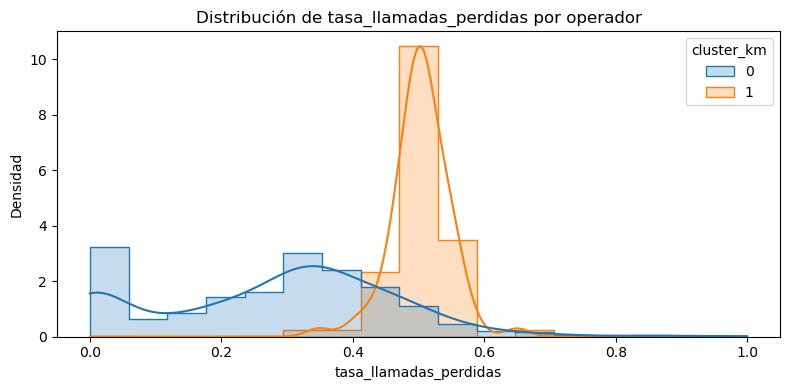

In [104]:
for col in new_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_operadores_f, x=col, hue='cluster_km', kde=True, stat="density", element="step", palette='tab10', common_norm=False)
    plt.title(f'Distribución de {col} por operador')
    plt.xlabel(col)
    plt.ylabel('Densidad')
   
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




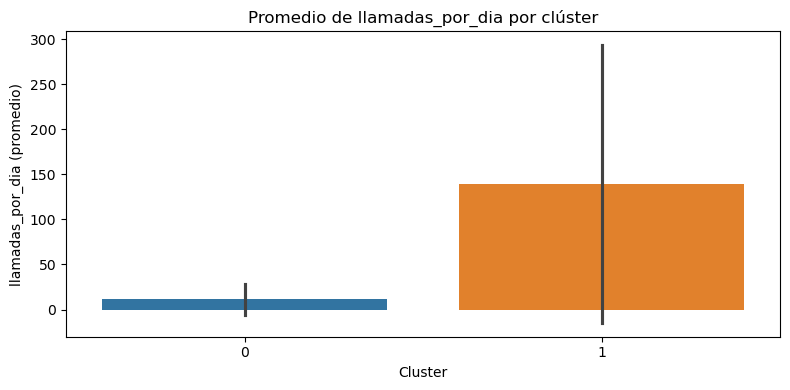

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




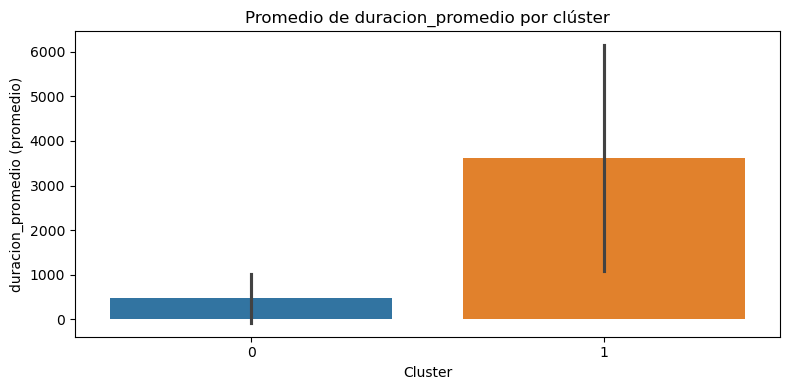

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




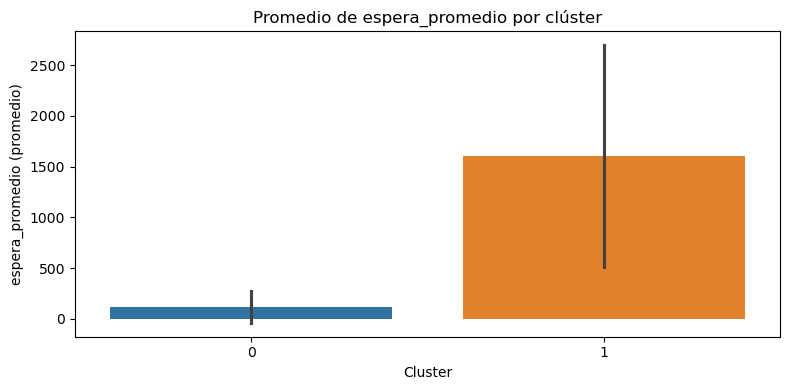

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\630196027.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




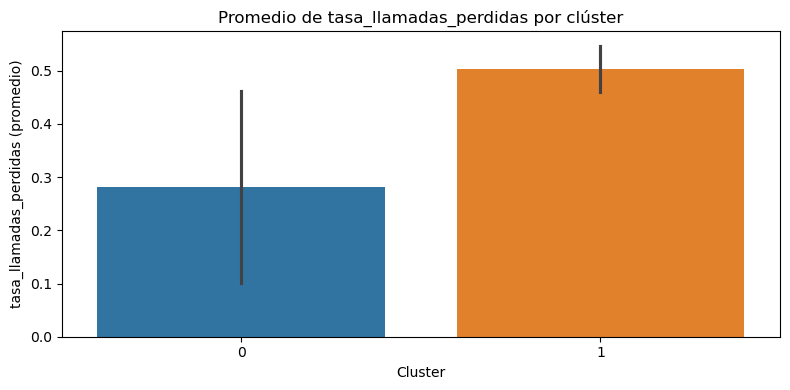

In [105]:
for col in new_columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_operadores_f, x='cluster_km', y=col, palette='tab10', ci='sd')
    plt.title(f'Promedio de {col} por clúster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{col} (promedio)')
    
    plt.tight_layout()
    plt.show()

# Conclusion clustering
Se observaron datos no esperados en el clustering, esperaba observar un cluster con un mayor promedio de llamadas perdidas, mayor promedio de tiempo de espera, altos promedios de duracion de llamada, y una cantidad de llamadas similar a la del otro cluster, debido a que se registran tanto las llamadas perdidas como respondidas, por el contrario, se observo un cluster que presento valores mucho menores a los del otro cluster, con un bajo numero de llamadas. Es posible que el clustering en lugar de ayudarme a clasificar los operadores por su rendimiento, me identificara un grupo de operadores con otro tipo de funciones, como funciones administrativas o de liderazgo, esto explicaria porque estos operadores registraban tan pocas llamadas diarias a pesar de presentar una baja tasa de llamadas perdidas y bajo tiempo de espera. Incluso es posible que fueran empleados que iniciaron como operadores y despues fueron ascendidos, y por eso presentan llamadas registradas pese a que actualmente no se dediquen a eso, sin embargo, se requiere mas informacion para determinar esto.

# Analisis de percentiles

In [127]:
df_operadores_f.describe()

,operador_id,llamadas_por_dia,duracion_promedio,espera_promedio,tasa_llamadas_perdidas,cluster_km
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,921356.263505,23.646809,771.504302,258.501649,0.302203,0.096179
std,20355.947796,62.879712,1319.725762,572.565729,0.184124,0.295031
min,879896.000000,0.027778,0.000000,0.500000,0.000000,0.000000
25%,904694.000000,0.861643,141.333333,28.266667,0.175192,0.000000
50%,920728.000000,4.241935,328.088889,56.636364,0.331361,0.000000
75%,937982.000000,21.346561,805.620370,209.011141,0.444444,0.000000
max,959312.000000,888.400000,14620.545455,5907.443038,1.000000,1.000000


In [69]:
print('Percentiles 90, 95, 99 de operadores con llamadas perdidas', np.percentile(df_operadores_f['tasa_llamadas_perdidas'], [90, 95, 99]))

Percentiles 90, 95, 99 de operadores con llamadas perdidas [0.51479501 0.55210728 0.66666667]


In [84]:
print('Percentiles 90, 95, 99 de operadores con tiempo  de espera promedio', np.percentile(df_operadores_f['espera_promedio'], [90, 95, 99]))

Percentiles 90, 95, 99 de operadores con tiempo  de espera promedio [ 703.79721238 1286.81756757 2461.16464461]


In [67]:
print('1, 5 y 10% de operadores con menos llamadas diarias', np.percentile(df_operadores_f['llamadas_por_dia'], [1, 5, 10]))

1, 5 y 10% de operadores con menos llamadas diarias [0.08701299 0.17621483 0.28368298]


In [ ]:
# Operadores con mayor tasa de llamadas perdidas

C:\Users\HP\AppData\Local\Temp\ipykernel_15584\2092278585.py:3: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



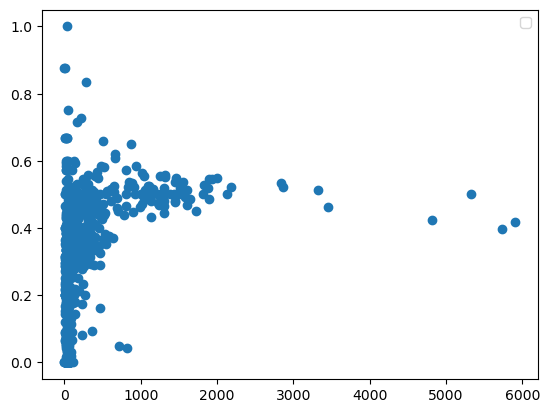

In [ ]:
plt.scatter(df_operadores_f['espera_promedio'], df_operadores_f['tasa_llamadas_perdidas'])
plt.legend()

In [92]:
print("La correlacion de Pearson es", df_operadores_f['espera_promedio'].corr(df_operadores_f['tasa_llamadas_perdidas']))

La correlacion de Pearson es 0.35105698774165445


In [110]:
operadores_mayor_tasa_llamadasperdidas = df_operadores_f[df_operadores_f['tasa_llamadas_perdidas'] > 0.51479501]

In [111]:
operadores_mayor_tasa_llamadasperdidas['cluster_km'].value_counts()

cluster_km
0    49
1    27
Name: count, dtype: int64

In [112]:
operadores_t = operadores_mayor_tasa_llamadasperdidas['operador_id']

In [113]:
# Tiempo de espera promedio de los operadores con mayor tasa de llamadas perdidas
operadores_mayor_tasa_llamadasperdidas['espera_promedio'].mean()

np.float64(661.390400204562)

In [125]:
# Numero de llamadas por dia en operadores con mayor tasa de llamadas perdidas
operadores_mayor_tasa_llamadasperdidas['llamadas_por_dia'].mean()

np.float64(47.69385291095092)

La correlacion de Pearson es -0.38967054762977654


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\1189888911.py:2: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



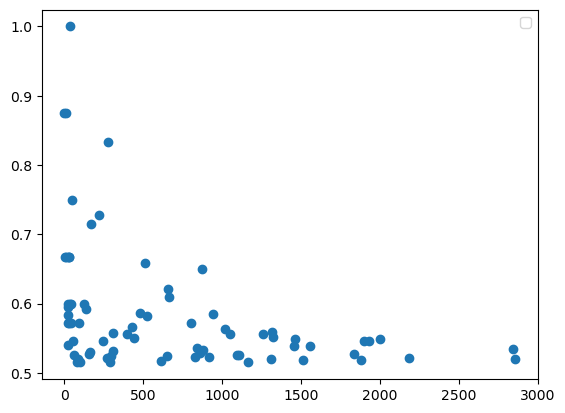

In [114]:
plt.scatter(operadores_mayor_tasa_llamadasperdidas['espera_promedio'], operadores_mayor_tasa_llamadasperdidas['tasa_llamadas_perdidas'])
plt.legend()
print("La correlacion de Pearson es", operadores_mayor_tasa_llamadasperdidas['espera_promedio'].corr(operadores_mayor_tasa_llamadasperdidas['tasa_llamadas_perdidas']))

In [ ]:
### Operadores con mayor tiempo de espera

In [115]:
operadores_mayor_tiempo_espera = df_operadores_f[df_operadores_f['espera_promedio'] > 703.79721238]

In [116]:
# Tasa de llamadas perdidas en operadores con mayor tasa de espera
operadores_mayor_tiempo_espera['tasa_llamadas_perdidas'].mean()

np.float64(0.4920458510190669)

In [126]:
operadores_mayor_tiempo_espera['llamadas_por_dia'].mean()

np.float64(133.7026419201924)

In [117]:
operadores_mayor_tiempo_espera['cluster_km'].value_counts()

cluster_km
1    69
0     7
Name: count, dtype: int64

La correlacion de Pearson es -0.06332139091092849


C:\Users\HP\AppData\Local\Temp\ipykernel_15584\2266608732.py:2: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



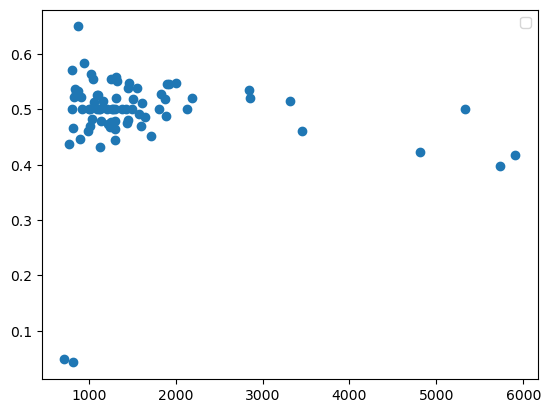

In [118]:
plt.scatter(operadores_mayor_tiempo_espera['espera_promedio'], operadores_mayor_tiempo_espera['tasa_llamadas_perdidas'])
plt.legend()
print("La correlacion de Pearson es", operadores_mayor_tiempo_espera['espera_promedio'].corr(operadores_mayor_tiempo_espera['tasa_llamadas_perdidas']))

In [119]:
# Operadores con menor numero de llamadas diarias
operadores_menos_llamadas_diaras = df_operadores_f[df_operadores_f['llamadas_por_dia'] < 0.28368298]

In [120]:
operadores_menos_llamadas_diaras['cluster_km'].value_counts()

cluster_km
0    76
Name: count, dtype: int64

In [121]:
operadores_menos_llamadas_diaras['tasa_llamadas_perdidas'].mean()

np.float64(0.13728230403926997)

In [122]:
operadores_menos_llamadas_diaras['espera_promedio'].mean()

np.float64(24.27208114168253)

In [123]:
operadores_mayor_perdida_llamadas_tiempoespera = df_operadores_f[(df_operadores_f['espera_promedio'] > 703.79721238) & (df_operadores_f['tasa_llamadas_perdidas'] > 0.51479501)]

In [124]:
operadores_mayor_perdida_llamadas_tiempoespera.shape

(29, 6)

In [146]:
operadores_con_menor_des = pd.concat([operadores_mayor_tiempo_espera['operador_id'], operadores_mayor_tasa_llamadasperdidas['operador_id']]).to_frame(name = 'operador_id')

In [147]:
operadores_con_menor_des = operadores_con_menor_des.drop_duplicates()

In [148]:
# Crea una nueva columna con valor por defecto
operadores_con_menor_des['descripcion'] = 'Otro'

# Operadores que están en ambos grupos
en_ambos = operadores_con_menor_des['operador_id'].isin(operadores_mayor_perdida_llamadas_tiempoespera['operador_id'])

# Solo en pérdida de llamadas
solo_perdida = operadores_con_menor_des['operador_id'].isin(operadores_mayor_tasa_llamadasperdidas['operador_id'])

# Solo en tiempo de espera
solo_tiempo = operadores_con_menor_des['operador_id'].isin(operadores_mayor_tiempo_espera['operador_id'])

# Asignar descripciones
operadores_con_menor_des.loc[solo_perdida, 'descripcion'] = 'Top 10% con mayor tasa de perdida de llamadas'
operadores_con_menor_des.loc[solo_tiempo, 'descripcion'] = 'Top 10% con mayor tiempo de espera'
operadores_con_menor_des.loc[en_ambos, 'descripcion'] = 'Top 10% con mayor tasa de perdida de llamadas y mayor tiempo de espera'

In [149]:
operadores_con_menor_des['descripcion'].value_counts()

descripcion
Top 10% con mayor tiempo de espera                                        47
Top 10% con mayor tasa de perdida de llamadas                             47
Top 10% con mayor tasa de perdida de llamadas y mayor tiempo de espera    29
Name: count, dtype: int64

In [150]:
operadores_con_menor_des.head()

,operador_id,descripcion
19,885876.0,Top 10% con mayor tiempo de espera
20,885890.0,Top 10% con mayor tiempo de espera
168,902748.0,Top 10% con mayor tasa de perdida de llamadas ...
170,902776.0,Top 10% con mayor tasa de perdida de llamadas ...
182,904016.0,Top 10% con mayor tiempo de espera


# Conclusion
Se identifico el percentil del 10% de los operadores que presentaron mayores tasas de perdida de llamdas (tasa de perdida de llamadas del 0.514) y de tiempo de espera (703 segundos) y aquellos que entreban en ambas categorias. El 10% de los operadores con mayores tasas de perdida de llamdas tambien mostraron un promedio de tiempo de espera mas alto que el promedio, con 661.39 segundos mientras que el resto de operadores mostraron una media de 258.5 segundos de espera. Mientras que el 10% de los operadores con mayores tiempos de espera tambien presentaron peores tasas de llamadas perdidas (0.49) que el resto de operadores (0.30). Se seleccionaron a los 123 operadores con peores metricas:
- Top 10% con mayor tiempo de espera                                        47
- Top 10% con mayor tasa de perdida de llamadas                             47
- Top 10% con mayor tasa de perdida de llamadas y mayor tiempo de espera    29

Por otro lado, el 10% de operadores que presento un menor numero de llamadas diarias presento 0.28368298 llamadas diarias, lo que podria reforzar la idea de que en los datos se incluyen operadores que cumplen otras funciones o antiguos operadores que ascendieron a otro puesto que al dividir el numero de llamadas totales que registraron entre la cantidad de dias laborando da lugar a un promedio de llamadas diarias tan bajo. Pero se requiere mas informacion para clasificar a estos operadores